In [1]:
# import libaray
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [3]:
# delete warnings
import warnings 
warnings.filterwarnings('ignore')

In [5]:
# read image dataset ---> train, test
train_path =r"D:\Deep Learning project & tasks\Datasets\Covid19-dataset\train"
test_path =r"D:\Deep Learning project & tasks\Datasets\Covid19-dataset\test"

In [9]:
# image classes
image_classes=os.listdir(r'D:\Deep Learning project & tasks\Datasets\Covid19-dataset\train')
print(image_classes)

['Covid', 'Normal', 'Viral Pneumonia']


In [11]:
# visualizetion data
def plot_image(image_classes):
    plt.figure(figsize=(12,12))
    
    for i, category in enumerate(image_classes):
        image_path = train_path + '/' + category
        images_in_folder = os.listdir(image_path)
        
        first_image = images_in_folder[0]
        first_image_path = image_path + '/' + first_image
        
        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255
        
        plt.subplot(1,3,i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()    

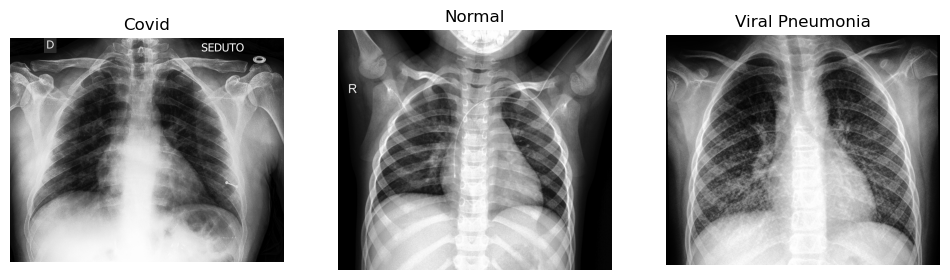

In [16]:
plot_image(image_classes)

In [18]:
# image preprocessing
data_generator = ImageDataGenerator(rescale = 1 / 255)

In [20]:
# train data generator
train_data = data_generator.flow_from_directory(train_path,target_size=(224,224),batch_size=16)

Found 251 images belonging to 3 classes.


In [22]:
# test data generator
test_data = data_generator.flow_from_directory(test_path,target_size=(224,224),batch_size=1)

Found 66 images belonging to 3 classes.


In [26]:
# CNN Model
model = Sequential()

# add conv layer with filters, kernel, padding, activation, input_shape
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[224,224,3]))
# add pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# add conv layer
model.add(Conv2D(filters=64 , kernel_size=3, padding='same',activation='relu'))
# add pooling layer
model.add(MaxPooling2D())
# add conv layer
model.add(Conv2D(filters=128 , kernel_size=3, padding='same',activation='relu'))
# add pooling layer
model.add(MaxPooling2D())
# add flatten layer --> 1D
model.add(Flatten())
# add fully connected layers
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
# add output layer
model.add(Dense(3,activation='softmax'))

In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,946,883 (49.39 MB)

 Trainable params: 12,946,883 (49.39 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# compile model
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [34]:
# fit model
model_history=model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5009 - loss: 1.0872 - val_accuracy: 0.6515 - val_loss: 1.5891
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8137 - loss: 0.6005 - val_accuracy: 0.7727 - val_loss: 0.4911
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9432 - loss: 0.1374 - val_accuracy: 0.8485 - val_loss: 0.4399
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9948 - loss: 0.0506 - val_accuracy: 0.9091 - val_loss: 0.2608
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 987ms/step - accuracy: 0.9794 - loss: 0.0612 - val_accuracy: 0.8939 - val_loss: 0.2047
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 979ms/step - accuracy: 0.9964 - loss: 0.0143 - val_accuracy: 0.8939 - val_loss: 0.4359
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 998ms/step - accuracy: 0.9898 - loss: 0.0290 - val_accuracy: 0.8788 - val_loss: 0.4126
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 995ms/step - accuracy: 0.9915 - loss: 0.0212 - val_accuracy: 0.9242

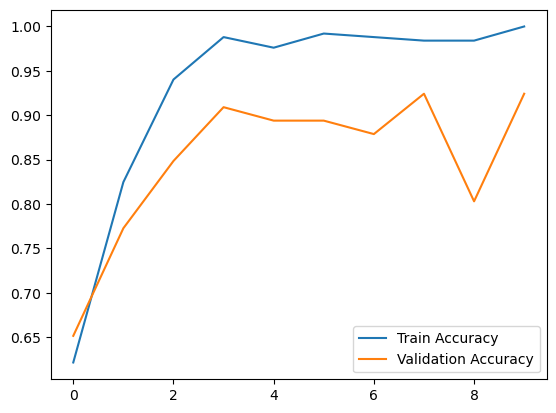

In [36]:
# visualize model
plt.plot(model_history.history['accuracy'],label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

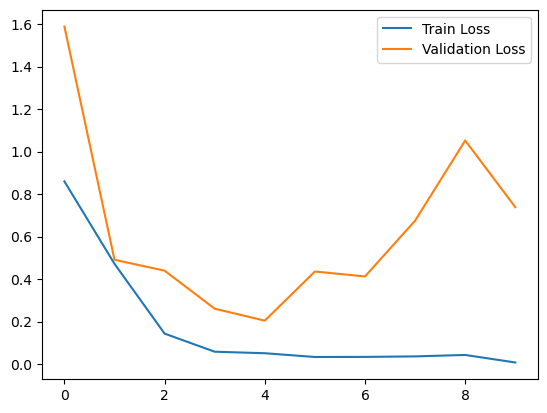

In [38]:
# visualize model
plt.plot(model_history.history['loss'],label='Train Loss')
plt.plot(model_history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

In [40]:
model.evaluate(test_data)

66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9553 - loss: 0.5624


[0.738715648651123, 0.9242424368858337]

In [42]:
model.evaluate(train_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 540ms/step - accuracy: 1.0000 - loss: 0.0026


[0.0023831648286432028, 1.0]

In [44]:
# save model
model.save('Covid19_model.h5')

In [46]:
# map class from string to number
class_map=dict([value,key] for key, value in train_data.class_indices.items())

In [48]:
class_map

{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}

In [50]:
# prediction 
import numpy as np
def prediction(test_image, actual_label):
    # load & preprocessing image
    testing_img = image.load_img(test_image,target_size=(224,224))
    test_img_array = image.img_to_array(testing_img) / 255

    test_img_input = test_img_array.reshape(1,test_img_array.shape[0],
                                          test_img_array.shape[1],
                                         test_img_array.shape[2])
    # make prediction
    predicted_class = np.argmax(model.predict(test_img_input))
    predicted_img = class_map[predicted_class]
    # plot image
    plt.figure(figsize=(4,4))
    plt.imshow(test_img_array)
    plt.title(f'Actual label : {actual_label}, Predicted label : {predicted_img}')
    plt.grid()
    plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


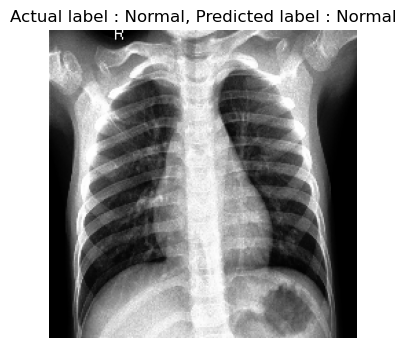

In [52]:
test_img = r"D:\Deep Learning project & tasks\Datasets\Covid19-dataset\test\Normal\0117.jpeg"
prediction(test_img, actual_label='Normal')